In [15]:
# Copyright (c) Microsoft Corporation.
# Licensed under the MIT License.

"""Tabular Q-learning agent (notebook)

This notebooks can be run directly from VSCode, to generate a
traditional Jupyter Notebook to open in your browser
 you can run the VSCode command `Export Currenty Python File As Jupyter Notebook`.
"""

# pylint: disable=invalid-name

'Tabular Q-learning agent (notebook)\n\nThis notebooks can be run directly from VSCode, to generate a\ntraditional Jupyter Notebook to open in your browser\n you can run the VSCode command `Export Currenty Python File As Jupyter Notebook`.\n'

In [18]:
import sys
import logging
from typing import cast
import gym
import numpy as np
import matplotlib.pyplot as plt  # type:ignore
from cyberbattle.agents.baseline.learner import TrainedLearner
import cyberbattle.agents.baseline.plotting as p
import cyberbattle.agents.baseline.agent_wrapper as w
import cyberbattle.agents.baseline.agent_tabularqlearning as a
from cyberbattle.agents.baseline.agent_wrapper import Verbosity
import cyberbattle.agents.baseline.learner as learner
from cyberbattle._env.cyberbattle_env import AttackerGoal

logging.basicConfig(stream=sys.stdout, level=logging.ERROR, format="%(levelname)s: %(message)s")

In [19]:
%matplotlib inline 

In [20]:
# Benchmark parameters:
#   Parameters from DeepDoubleQ paper
#    - learning_rate = 0.00025
#    - linear epsilon decay
#    - gamma = 0.99
#   Eliminated gamma_values
#       0.0,
#       0.0015,  # too small
#       0.15,  # too big
#       0.25,  # too big
#       0.35,  # too big
#
# NOTE: Given the relatively low number of training episodes (50,
# a high learning rate of .99 gives better result
# than a lower learning rate of 0.25 (i.e. maximal rewards reached faster on average).
# Ideally we should decay the learning rate just like gamma and train over a
# much larger number of episodes

cyberbattlechain_10 = gym.make('CyberBattleChain-v0', size=10, attacker_goal=AttackerGoal(own_atleast_percent=1.0))


ep = w.EnvironmentBounds.of_identifiers(
    maximum_node_count=12,
    maximum_total_credentials=12,
    identifiers=cyberbattlechain_10.identifiers
)

iteration_count = 9000
training_episode_count = 5
eval_episode_count = 5
gamma_sweep = [
    0.015,  # about right
]


def qlearning_run(gamma, gym_env):
    """Execute one run of the q-learning algorithm for the
    specified gamma value"""
    return learner.epsilon_greedy_search(
        gym_env,
        ep,
        a.QTabularLearner(ep, gamma=gamma, learning_rate=0.90, exploit_percentile=100),
        episode_count=training_episode_count,
        iteration_count=iteration_count,
        epsilon=0.90,
        render=False,
        epsilon_multdecay=0.75,  # 0.999,
        epsilon_minimum=0.01,
        verbosity=Verbosity.Quiet,
        title="Q-learning"
    )

###### Q-learning
Learning with: episode_count=5,iteration_count=9000,ϵ=0.9,ϵ_min=0.01, ϵ_multdecay=0.75,γ=0.015,learning_rate=0.9,Q%=100
  ## Episode: 1/5 'Q-learning' ϵ=0.9000, γ=0.015,learning_rate=0.9,Q%=100


Episode 1|Iteration 968|reward: 6304.0|last_reward_at:  968|Elapsed Time: 0:00:03||


  Episode 1 ended at t=968 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 18/227 (0.07)
    explore-remote: 20/316 (0.06)
    explore-connect: 0/334 (0.00)
    exploit-local: 3/17 (0.15)
    exploit-remote: 0/22 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 48
  ## Episode: 2/5 'Q-learning' ϵ=0.6750, γ=0.015,learning_rate=0.9,Q%=100


Episode 2|Iteration 237|reward: 6272.0|last_reward_at:  237|Elapsed Time: 0:00:00||


  Episode 2 ended at t=237 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/44 (0.19)
    explore-remote: 15/47 (0.24)
    explore-connect: 0/76 (0.00)
    exploit-local: 10/19 (0.34)
    exploit-remote: 1/4 (0.20)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 42
  ## Episode: 3/5 'Q-learning' ϵ=0.5063, γ=0.015,learning_rate=0.9,Q%=100


Episode 3|Iteration 343|reward: 6282.0|last_reward_at:  343|Elapsed Time: 0:00:01||


  Episode 3 ended at t=343 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/60 (0.19)
    explore-remote: 11/72 (0.13)
    explore-connect: 0/76 (0.00)
    exploit-local: 6/31 (0.16)
    exploit-remote: 7/55 (0.11)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 67
  ## Episode: 4/5 'Q-learning' ϵ=0.3797, γ=0.015,learning_rate=0.9,Q%=100


Episode 4|Iteration 203|reward: 6282.0|last_reward_at:  203|Elapsed Time: 0:00:00||


  Episode 4 ended at t=203 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/31 (0.18)
    explore-remote: 9/38 (0.19)
    explore-connect: 0/37 (0.00)
    exploit-local: 12/21 (0.36)
    exploit-remote: 10/27 (0.27)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 41
  ## Episode: 5/5 'Q-learning' ϵ=0.2848, γ=0.015,learning_rate=0.9,Q%=100


Episode 5|Iteration 245|reward: 6270.0|last_reward_at:  245|Elapsed Time: 0:00:00||


  Episode 5 ended at t=245 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/36 (0.12)
    explore-remote: 10/41 (0.20)
    explore-connect: 0/49 (0.00)
    exploit-local: 14/27 (0.34)
    exploit-remote: 7/45 (0.13)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 80
simulation ended


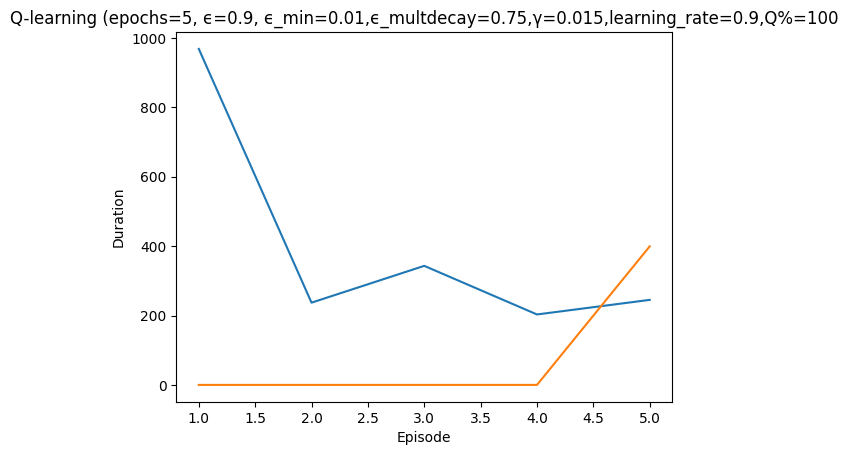

In [21]:
# Run Q-learning with gamma-sweep
qlearning_results = [qlearning_run(gamma, cyberbattlechain_10) for gamma in gamma_sweep]

qlearning_bestrun_10 = qlearning_results[0]

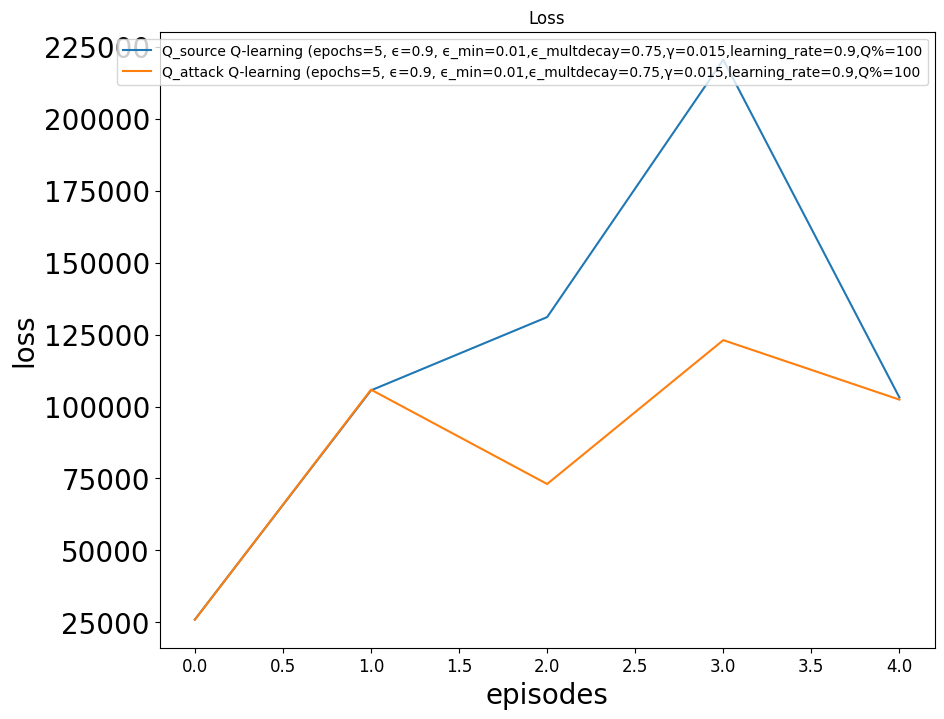

In [22]:
p.new_plot_loss()
for results in qlearning_results:
    p.plot_all_episodes_loss(cast(a.QTabularLearner, results['learner']).loss_qsource.all_episodes, 'Q_source', results['title'])
    p.plot_all_episodes_loss(cast(a.QTabularLearner, results['learner']).loss_qattack.all_episodes, 'Q_attack', results['title'])
plt.legend(loc="upper right")
plt.show()

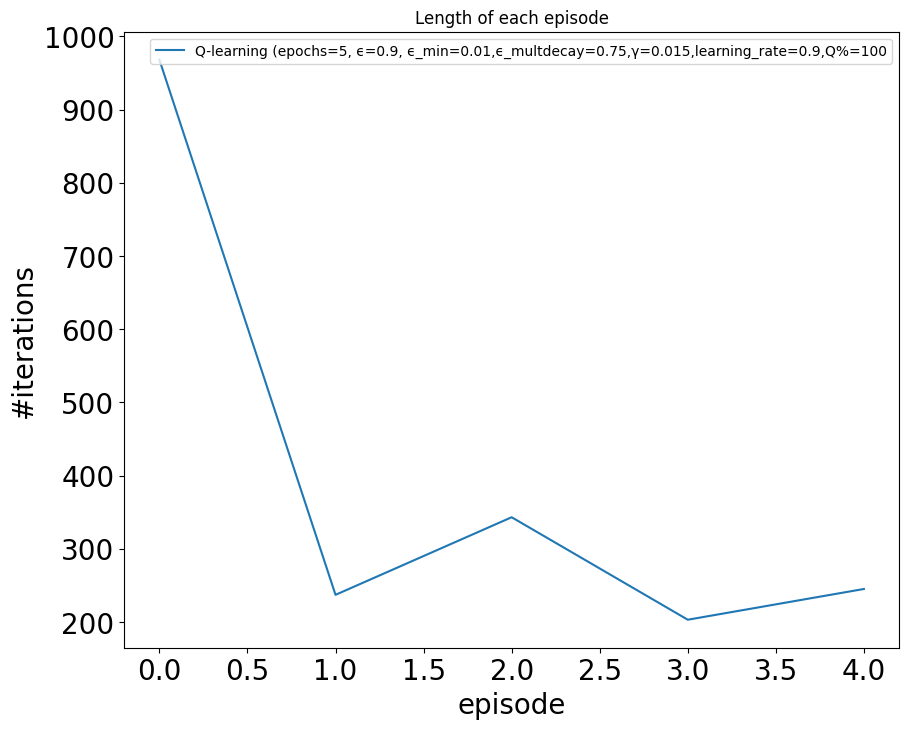

In [23]:

p.plot_episodes_length(qlearning_results)

###### Exploiting Q-matrix
Learning with: episode_count=5,iteration_count=9000,ϵ=0.3,ϵ_min=0.0, γ=0.0,learning_rate=0.0,Q%=100
  ## Episode: 1/5 'Exploiting Q-matrix' ϵ=0.3000, γ=0.0,learning_rate=0.0,Q%=100


Episode 1|Iteration 1058|reward: 6294.0|last_reward_at: 1058|Elapsed Time: 0:00:03||


  Episode 1 ended at t=1058 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/132 (0.07)
    explore-remote: 20/171 (0.10)
    explore-connect: 0/177 (0.00)
    exploit-local: 10/514 (0.02)
    exploit-remote: 0/13 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 208
  ## Episode: 2/5 'Exploiting Q-matrix' ϵ=0.3000, γ=0.0,learning_rate=0.0,Q%=100


Episode 2|Iteration 869|reward: 6260.0|last_reward_at:  869|Elapsed Time: 0:00:02||


  Episode 2 ended at t=869 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/99 (0.07)
    explore-remote: 15/122 (0.11)
    explore-connect: 0/172 (0.00)
    exploit-local: 9/411 (0.02)
    exploit-remote: 2/20 (0.09)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 164
  ## Episode: 3/5 'Exploiting Q-matrix' ϵ=0.3000, γ=0.0,learning_rate=0.0,Q%=100


Episode 3|Iteration 1545|reward: 6292.0|last_reward_at: 1545|Elapsed Time: 0:00:05||


  Episode 3 ended at t=1545 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/212 (0.05)
    explore-remote: 18/305 (0.06)
    explore-connect: 0/303 (0.00)
    exploit-local: 9/608 (0.01)
    exploit-remote: 2/66 (0.03)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 389
  ## Episode: 4/5 'Exploiting Q-matrix' ϵ=0.3000, γ=0.0,learning_rate=0.0,Q%=100


Episode 4|Iteration 536|reward: 6262.0|last_reward_at:  536|Elapsed Time: 0:00:01||


  Episode 4 ended at t=536 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/62 (0.13)
    explore-remote: 16/61 (0.21)
    explore-connect: 0/87 (0.00)
    exploit-local: 9/279 (0.03)
    exploit-remote: 0/2 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 79
  ## Episode: 5/5 'Exploiting Q-matrix' ϵ=0.3000, γ=0.0,learning_rate=0.0,Q%=100


Episode 5|Iteration 1056|reward: 6290.0|last_reward_at: 1056|Elapsed Time: 0:00:04||


  Episode 5 ended at t=1056 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/168 (0.07)
    explore-remote: 17/184 (0.08)
    explore-connect: 0/221 (0.00)
    exploit-local: 7/383 (0.02)
    exploit-remote: 3/49 (0.06)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 288
simulation ended


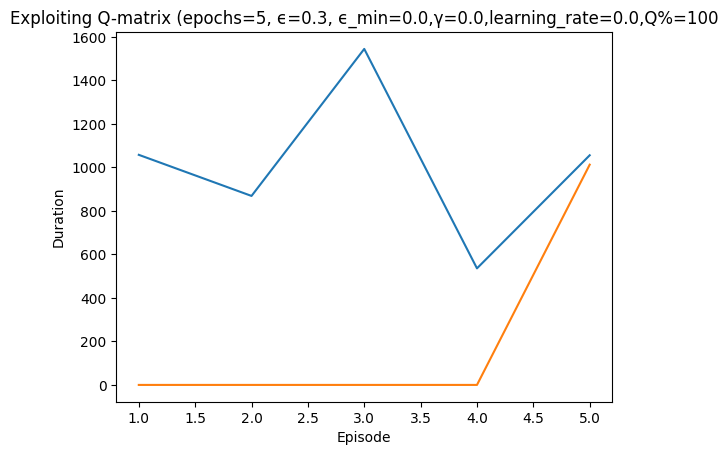

In [24]:
nolearning_results = learner.epsilon_greedy_search(
    cyberbattlechain_10,
    ep,
    learner=a.QTabularLearner(ep, trained=qlearning_bestrun_10['learner'],
                              gamma=0.0, learning_rate=0.0, exploit_percentile=100),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=0.30,  # 0.35,
    render=False,
    title="Exploiting Q-matrix",
    verbosity=Verbosity.Quiet
)

###### Random search
Learning with: episode_count=5,iteration_count=9000,ϵ=1.0,ϵ_min=0.0, γ=0.0,learning_rate=0.0,Q%=100
  ## Episode: 1/5 'Random search' ϵ=1.0000, γ=0.0,learning_rate=0.0,Q%=100


Episode 1|Iteration 9000|reward: 1194.0|last_reward_at: 8358|Elapsed Time: 0:00:35||


  Episode 1 stopped at t=9000 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/2431 (0.01)
    explore-remote: 20/3241 (0.01)
    explore-connect: 9/3280 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 2/5 'Random search' ϵ=1.0000, γ=0.0,learning_rate=0.0,Q%=100


Episode 2|Iteration 9000|reward: 1194.0|last_reward_at: 4664|Elapsed Time: 0:00:36||


  Episode 2 stopped at t=9000 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/2535 (0.01)
    explore-remote: 20/3206 (0.01)
    explore-connect: 9/3211 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 3/5 'Random search' ϵ=1.0000, γ=0.0,learning_rate=0.0,Q%=100


Episode 3|Iteration 9000|reward: 1060.0|last_reward_at: 7288|Elapsed Time: 0:00:31||


  Episode 3 stopped at t=9000 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 17/2441 (0.01)
    explore-remote: 18/3209 (0.01)
    explore-connect: 8/3307 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 4/5 'Random search' ϵ=1.0000, γ=0.0,learning_rate=0.0,Q%=100


Episode 4|Iteration 9000|reward: 1060.0|last_reward_at: 7933|Elapsed Time: 0:00:31||


  Episode 4 stopped at t=9000 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 17/2443 (0.01)
    explore-remote: 18/3333 (0.01)
    explore-connect: 8/3181 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 5/5 'Random search' ϵ=1.0000, γ=0.0,learning_rate=0.0,Q%=100


Episode 5|Iteration 9000|reward: 1194.0|last_reward_at: 8358|Elapsed Time: 0:00:30||


  Episode 5 stopped at t=9000 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/2457 (0.01)
    explore-remote: 20/3297 (0.01)
    explore-connect: 9/3198 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
simulation ended


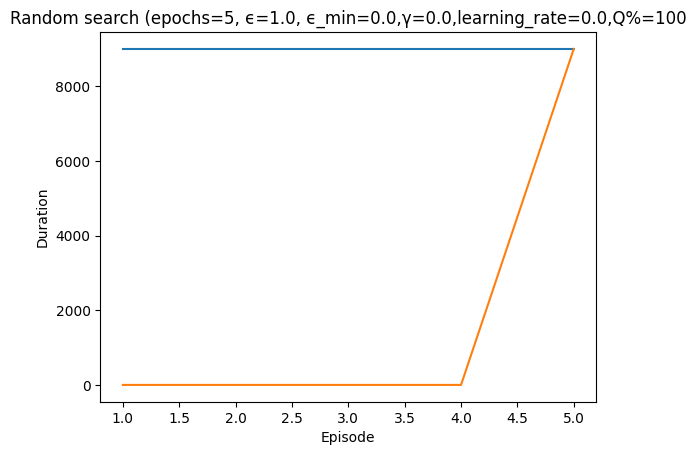

In [25]:
randomlearning_results = learner.epsilon_greedy_search(
    cyberbattlechain_10,
    ep,
    learner=a.QTabularLearner(ep, trained=qlearning_bestrun_10['learner'],
                              gamma=0.0, learning_rate=0.0, exploit_percentile=100),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=1.0,  # purely random
    render=False,
    verbosity=Verbosity.Quiet,
    title="Random search"
)

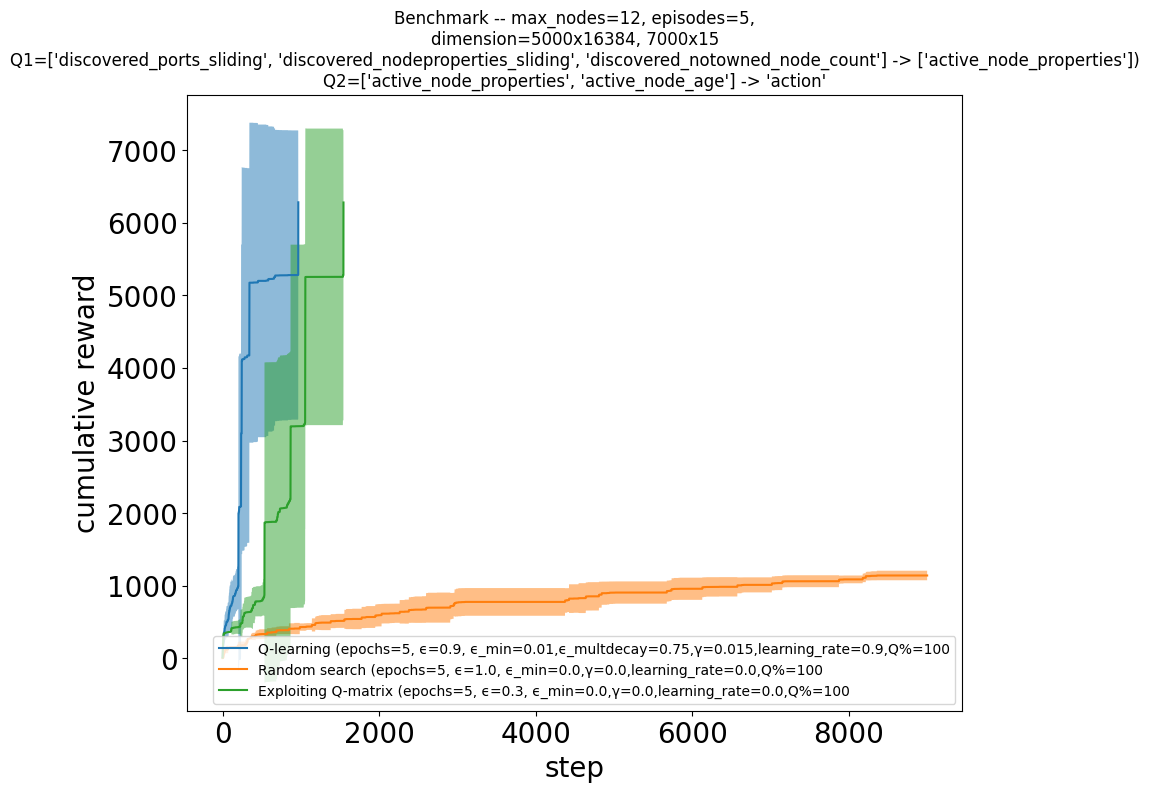

In [26]:
# Plot averaged cumulative rewards for Q-learning vs Random vs Q-Exploit
all_runs = [*qlearning_results,
            randomlearning_results,
            nolearning_results
            ]

Q_source_10 = cast(a.QTabularLearner, qlearning_bestrun_10['learner']).qsource
Q_attack_10 = cast(a.QTabularLearner, qlearning_bestrun_10['learner']).qattack

p.plot_averaged_cummulative_rewards(
    all_runs=all_runs,
    title=f'Benchmark -- max_nodes={ep.maximum_node_count}, episodes={eval_episode_count},\n'
    f'dimension={Q_source_10.state_space.flat_size()}x{Q_source_10.action_space.flat_size()}, '
    f'{Q_attack_10.state_space.flat_size()}x{Q_attack_10.action_space.flat_size()}\n'
    f'Q1={[f.name() for f in Q_source_10.state_space.feature_selection]} '
    f'-> {[f.name() for f in Q_source_10.action_space.feature_selection]})\n'
    f"Q2={[f.name() for f in Q_attack_10.state_space.feature_selection]} -> 'action'")

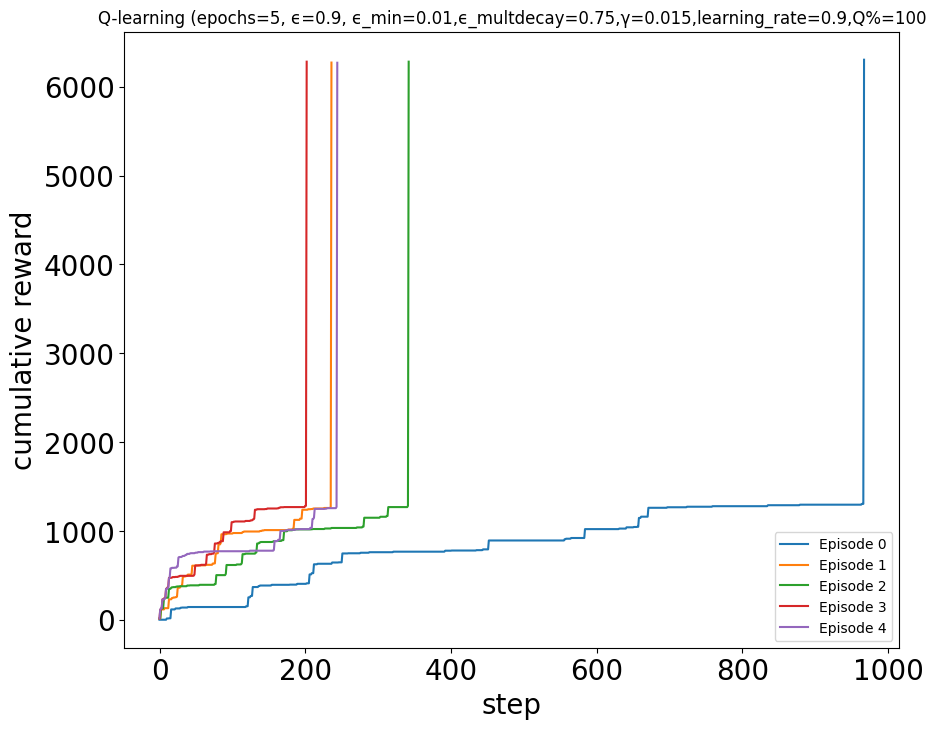

In [27]:
# plot cumulative rewards for all episodes
p.plot_all_episodes(qlearning_results[0])

In [28]:
# Plot the Q-matrices

In [29]:
# Print non-zero coordinate in the Q matrix Q_source
i = np.where(Q_source_10.qm)
q = Q_source_10.qm[i]
list(zip(np.array([Q_source_10.state_space.pretty_print(i) for i in i[0]]),
         np.array([Q_source_10.action_space.pretty_print(i) for i in i[1]]), q))

[('#106',
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  165.84908737942862),
 ('#106',
  array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]),
  152.48139643551508),
 ('#581',
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  3.9712139004144136e-07),
 ('#581',
  array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]),
  4.163754399453217e-07),
 ('#581',
  array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]),
  4501.260000014936),
 ('#1137',
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  100.1336064151966),
 ('#1226',
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  0.027679213051332335),
 ('#1226',
  array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]),
  16.320861772674036),
 ('#2219',
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  3.1828040787477933e-32),
 ('#2219', array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]), 8.1),
 ('#2283',
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  15.477534405029127),
 ('#3043', array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [30]:
# Print non-zero coordinate in the Q matrix Q_attack
i2 = np.where(Q_attack_10.qm)
q2 = Q_attack_10.qm[i2]
list(zip([Q_attack_10.state_space.pretty_print(i) for i in i2[0]],
         [Q_attack_10.action_space.pretty_print(i) for i in i2[1]], q2))


##################################################

[('#178', 0, 0.069572602044225),
 ('#178', 1, 0.0014908401275970365),
 ('#178', 3, 0.0486),
 ('#178', 5, 62.55465155756739),
 ('#178', 6, 66.82502567385554),
 ('#178', 8, 0.0009392301275970375),
 ('#178', 9, 4500.00103315314),
 ('#178', 10, 60.75001394756739),
 ('#178', 11, 0.0486),
 ('#178', 13, 0.0009392301275970375),
 ('#178', 14, 0.001207709999999999),
 ('#269', 0, 0.007896326910526975),
 ('#269', 1, 0.00024050000899656263),
 ('#269', 2, 0.0028523340337270834),
 ('#269', 3, 0.00040984580887534327),
 ('#269', 5, 0.00022595652678825514),
 ('#269', 6, 0.000289248372411938),
 ('#269', 7, 0.0004038129716266196),
 ('#269', 8, 1.600766057171749e-05),
 ('#269', 9, 0.014935724970420006),
 ('#269', 10, 0.00013458292406592107),
 ('#269', 12, 0.00020163228710067007),
 ('#269', 14, 0.0017764959215918093),
 ('#409', 1, 1.3102820470230958e-06),
 ('#409', 3, 0.0009391198502002085),
 ('#409', 5, 1.5104262375200742e-06),
 ('#409', 6, 5.407895531488447),
 ('#409', 12, 1.3731147613818858e-06),
 ('#541

## Transfer learning from size 4 to size 10
Exploiting Q-matrix learned from a different network.

###### Q-learning
Learning with: episode_count=5,iteration_count=9000,ϵ=0.9,ϵ_min=0.01, ϵ_multdecay=0.75,γ=0.015,learning_rate=0.9,Q%=100
  ## Episode: 1/5 'Q-learning' ϵ=0.9000, γ=0.015,learning_rate=0.9,Q%=100


Episode 1|Iteration 243|reward: 5530.0|last_reward_at:  243|Elapsed Time: 0:00:00||


  Episode 1 ended at t=243 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/46 (0.12)
    explore-remote: 8/92 (0.08)
    explore-connect: 1/80 (0.01)
    exploit-local: 3/2 (0.60)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 4/0 (1.00)
  exploit deflected to exploration: 10
  ## Episode: 2/5 'Q-learning' ϵ=0.6750, γ=0.015,learning_rate=0.9,Q%=100


Episode 2|Iteration 41|reward: 5500.0|last_reward_at:   41|Elapsed Time: 0:00:00||


  Episode 2 ended at t=41 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/2 (0.50)
    explore-remote: 4/8 (0.33)
    explore-connect: 0/13 (0.00)
    exploit-local: 6/0 (1.00)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 4
  ## Episode: 3/5 'Q-learning' ϵ=0.5063, γ=0.015,learning_rate=0.9,Q%=100


Episode 3|Iteration 23|reward: 5494.0|last_reward_at:   23|Elapsed Time: 0:00:00||


  Episode 3 ended at t=23 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 4/1 (0.80)
    explore-connect: 0/3 (0.00)
    exploit-local: 6/1 (0.86)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 2
  ## Episode: 4/5 'Q-learning' ϵ=0.3797, γ=0.015,learning_rate=0.9,Q%=100


Episode 4|Iteration 28|reward: 5488.0|last_reward_at:   28|Elapsed Time: 0:00:00||


  Episode 4 ended at t=28 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/3 (0.50)
    explore-remote: 0/5 (0.00)
    explore-connect: 0/6 (0.00)
    exploit-local: 5/1 (0.83)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 9
  ## Episode: 5/5 'Q-learning' ϵ=0.2848, γ=0.015,learning_rate=0.9,Q%=100


Episode 5|Iteration 58|reward: 5500.0|last_reward_at:   58|Elapsed Time: 0:00:00||


  Episode 5 ended at t=58 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/7 (0.22)
    explore-remote: 4/9 (0.31)
    explore-connect: 0/12 (0.00)
    exploit-local: 6/6 (0.50)
    exploit-remote: 0/7 (0.00)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 17
simulation ended


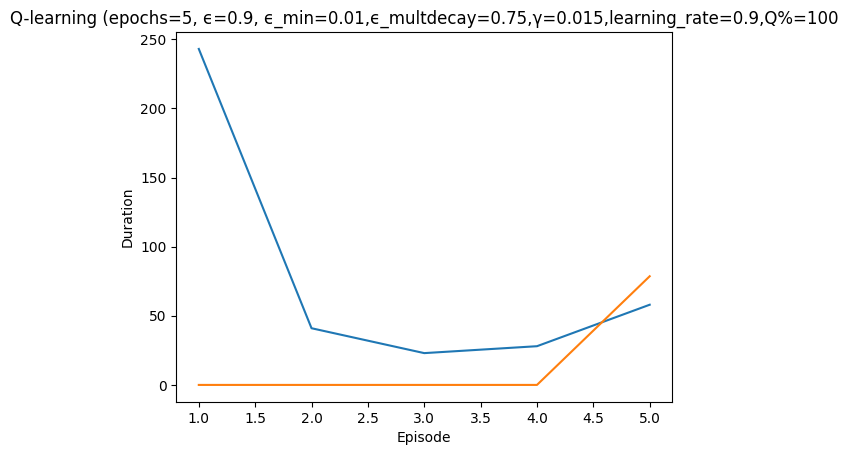

###### One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4
Learning with: episode_count=5,iteration_count=9000,ϵ=0.5,ϵ_min=0.0, γ=0.0,learning_rate=0.0,Q%=0
  ## Episode: 1/5 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 1|Iteration 823|reward: 6302.0|last_reward_at:  823|Elapsed Time: 0:00:03||


  Episode 1 ended at t=823 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 16/162 (0.09)
    explore-remote: 17/204 (0.08)
    explore-connect: 0/232 (0.00)
    exploit-local: 5/123 (0.04)
    exploit-remote: 3/50 (0.06)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 199
  ## Episode: 2/5 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 2|Iteration 729|reward: 6266.0|last_reward_at:  729|Elapsed Time: 0:00:02||


  Episode 2 ended at t=729 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/148 (0.07)
    explore-remote: 15/187 (0.07)
    explore-connect: 0/213 (0.00)
    exploit-local: 6/91 (0.06)
    exploit-remote: 2/44 (0.04)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 187
  ## Episode: 3/5 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 3|Iteration 475|reward: 6270.0|last_reward_at:  475|Elapsed Time: 0:00:01||


  Episode 3 ended at t=475 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/88 (0.12)
    explore-remote: 16/137 (0.10)
    explore-connect: 0/120 (0.00)
    exploit-local: 6/66 (0.08)
    exploit-remote: 1/18 (0.05)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 133
  ## Episode: 4/5 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 4|Iteration 590|reward: 6286.0|last_reward_at:  590|Elapsed Time: 0:00:02||


  Episode 4 ended at t=590 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/106 (0.12)
    explore-remote: 15/144 (0.09)
    explore-connect: 0/162 (0.00)
    exploit-local: 6/96 (0.06)
    exploit-remote: 3/33 (0.08)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 141
  ## Episode: 5/5 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 5|Iteration 836|reward: 6294.0|last_reward_at:  836|Elapsed Time: 0:00:03||


  Episode 5 ended at t=836 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/159 (0.07)
    explore-remote: 18/222 (0.07)
    explore-connect: 0/232 (0.00)
    exploit-local: 8/121 (0.06)
    exploit-remote: 2/51 (0.04)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 205
simulation ended


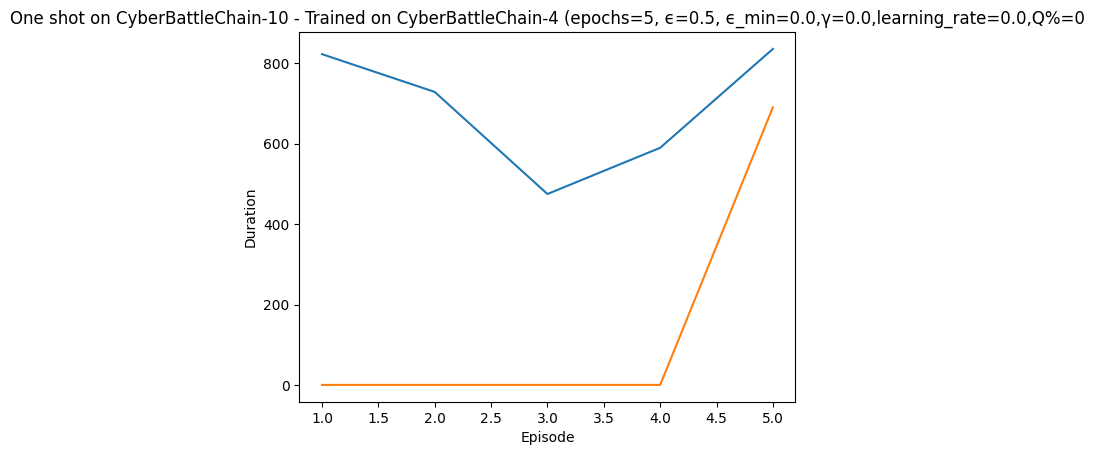

###### Benchmark
Learning with: episode_count=5,iteration_count=9000,ϵ=1.0,ϵ_min=0.0, 
  ## Episode: 1/5 'Benchmark' ϵ=1.0000, 


Episode 1|Iteration 8683|reward: 6314.0|last_reward_at: 8683|Elapsed Time: 0:00:30||


  Episode 1 ended at t=8683 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/2436 (0.01)
    explore-remote: 20/3085 (0.01)
    explore-connect: 11/3110 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 2/5 'Benchmark' ϵ=1.0000, 


Episode 2|Iteration 9000|reward: 1314.0|last_reward_at: 7453|Elapsed Time: 0:00:32||


  Episode 2 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/2515 (0.01)
    explore-remote: 20/3220 (0.01)
    explore-connect: 10/3214 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 3/5 'Benchmark' ϵ=1.0000, 


Episode 3|Iteration 9000|reward: 1192.0|last_reward_at: 8868|Elapsed Time: 0:00:30||


  Episode 3 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/2536 (0.01)
    explore-remote: 20/3217 (0.01)
    explore-connect: 9/3199 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 4/5 'Benchmark' ϵ=1.0000, 


Episode 4|Iteration 9000|reward: 1314.0|last_reward_at: 7779|Elapsed Time: 0:00:32||


  Episode 4 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/2558 (0.01)
    explore-remote: 20/3180 (0.01)
    explore-connect: 10/3211 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 5/5 'Benchmark' ϵ=1.0000, 


Episode 5|Iteration 8049|reward: 6310.0|last_reward_at: 8049|Elapsed Time: 0:00:28||


  Episode 5 ended at t=8049 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/2191 (0.01)
    explore-remote: 20/2938 (0.01)
    explore-connect: 11/2868 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
simulation ended


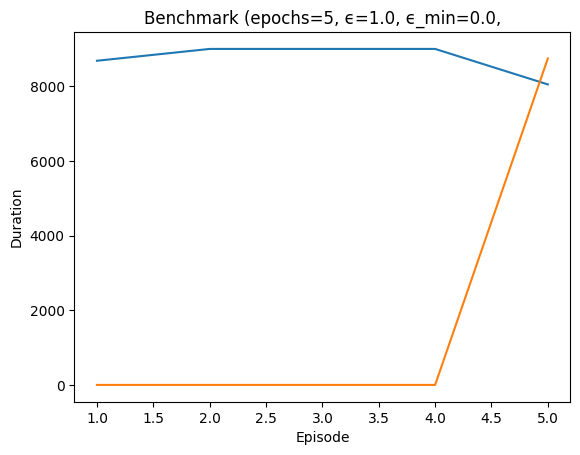

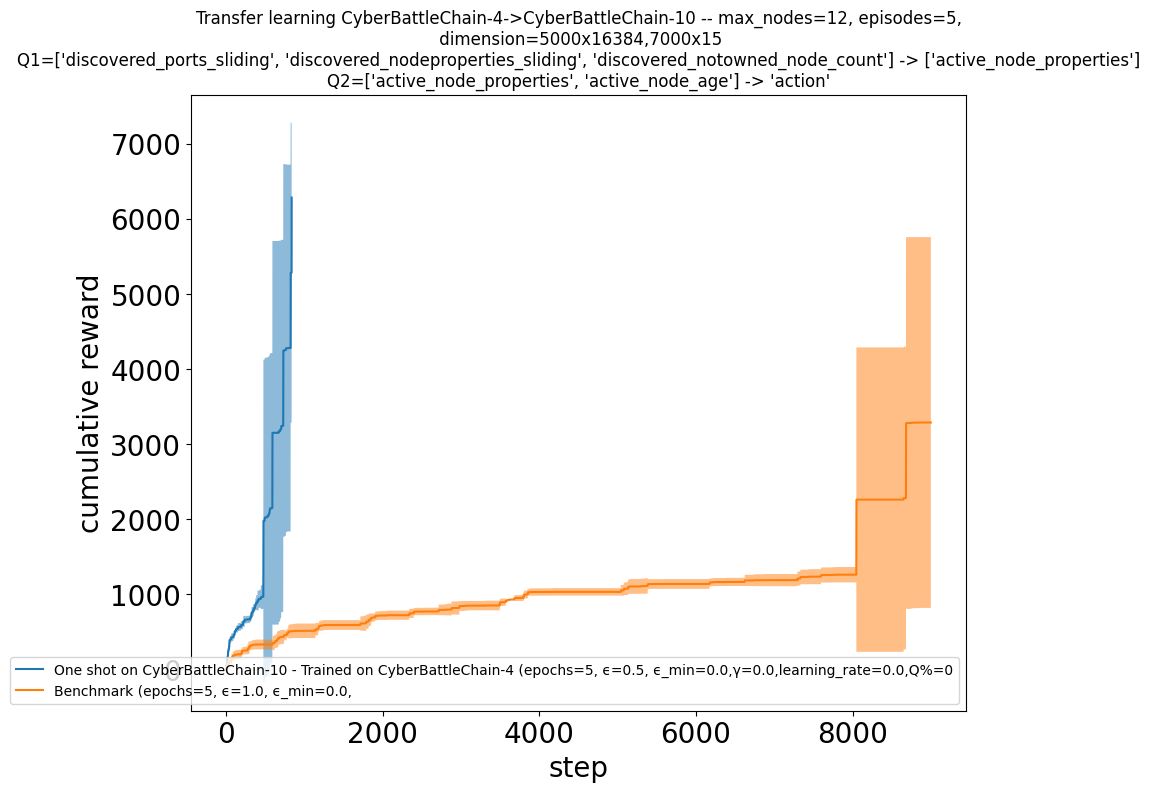

###### One shot on CyberBattleChain-4 - Trained on CyberBattleChain-10
Learning with: episode_count=5,iteration_count=9000,ϵ=0.5,ϵ_min=0.0, γ=0.0,learning_rate=0.0,Q%=0
  ## Episode: 1/5 'One shot on CyberBattleChain-4 - Trained on CyberBattleChain-10' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 1|Iteration 98|reward: 5520.0|last_reward_at:   98|Elapsed Time: 0:00:00||


  Episode 1 ended at t=98 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/13 (0.28)
    explore-remote: 6/26 (0.19)
    explore-connect: 0/25 (0.00)
    exploit-local: 3/11 (0.21)
    exploit-remote: 2/2 (0.50)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 31
  ## Episode: 2/5 'One shot on CyberBattleChain-4 - Trained on CyberBattleChain-10' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 2|Iteration 36|reward: 5502.0|last_reward_at:   36|Elapsed Time: 0:00:00||


  Episode 2 ended at t=36 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/4 (0.33)
    explore-remote: 6/3 (0.67)
    explore-connect: 0/10 (0.00)
    exploit-local: 4/0 (1.00)
    exploit-remote: 0/2 (0.00)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 7
  ## Episode: 3/5 'One shot on CyberBattleChain-4 - Trained on CyberBattleChain-10' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 3|Iteration 188|reward: 5522.0|last_reward_at:  188|Elapsed Time: 0:00:00||


  Episode 3 ended at t=188 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/35 (0.15)
    explore-remote: 5/45 (0.10)
    explore-connect: 0/52 (0.00)
    exploit-local: 2/27 (0.07)
    exploit-remote: 3/8 (0.27)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 42
  ## Episode: 4/5 'One shot on CyberBattleChain-4 - Trained on CyberBattleChain-10' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 4|Iteration 230|reward: 5526.0|last_reward_at:  230|Elapsed Time: 0:00:00||


  Episode 4 ended at t=230 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/30 (0.12)
    explore-remote: 8/69 (0.10)
    explore-connect: 1/59 (0.02)
    exploit-local: 4/34 (0.11)
    exploit-remote: 0/17 (0.00)
    exploit-connect: 4/0 (1.00)
  exploit deflected to exploration: 57
  ## Episode: 5/5 'One shot on CyberBattleChain-4 - Trained on CyberBattleChain-10' ϵ=0.5000, γ=0.0,learning_rate=0.0,Q%=0


Episode 5|Iteration 321|reward: 5528.0|last_reward_at:  321|Elapsed Time: 0:00:00||


  Episode 5 ended at t=321 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/46 (0.10)
    explore-remote: 7/79 (0.08)
    explore-connect: 0/102 (0.00)
    exploit-local: 4/49 (0.08)
    exploit-remote: 1/23 (0.04)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 82
simulation ended


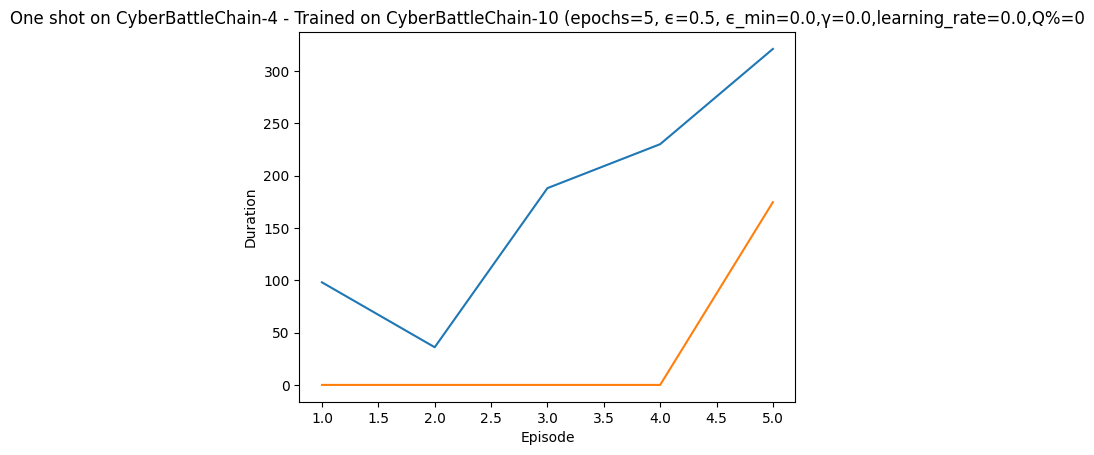

###### Benchmark
Learning with: episode_count=5,iteration_count=9000,ϵ=1.0,ϵ_min=0.0, 
  ## Episode: 1/5 'Benchmark' ϵ=1.0000, 


Episode 1|Iteration 603|reward: 5534.0|last_reward_at:  603|Elapsed Time: 0:00:01||


  Episode 1 ended at t=603 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/145 (0.06)
    explore-remote: 8/213 (0.04)
    explore-connect: 5/223 (0.02)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 2/5 'Benchmark' ϵ=1.0000, 


Episode 2|Iteration 685|reward: 5528.0|last_reward_at:  685|Elapsed Time: 0:00:01||


  Episode 2 ended at t=685 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/163 (0.05)
    explore-remote: 8/261 (0.03)
    explore-connect: 5/240 (0.02)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 3/5 'Benchmark' ϵ=1.0000, 


Episode 3|Iteration 1537|reward: 5534.0|last_reward_at: 1537|Elapsed Time: 0:00:02||


  Episode 3 ended at t=1537 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/397 (0.02)
    explore-remote: 8/556 (0.01)
    explore-connect: 5/562 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 4/5 'Benchmark' ϵ=1.0000, 


Episode 4|Iteration 1654|reward: 5534.0|last_reward_at: 1654|Elapsed Time: 0:00:02||


  Episode 4 ended at t=1654 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/417 (0.02)
    explore-remote: 8/607 (0.01)
    explore-connect: 5/608 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 5/5 'Benchmark' ϵ=1.0000, 


Episode 5|Iteration 1217|reward: 5534.0|last_reward_at: 1217|Elapsed Time: 0:00:01||


  Episode 5 ended at t=1217 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/306 (0.03)
    explore-remote: 8/467 (0.02)
    explore-connect: 5/422 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
simulation ended


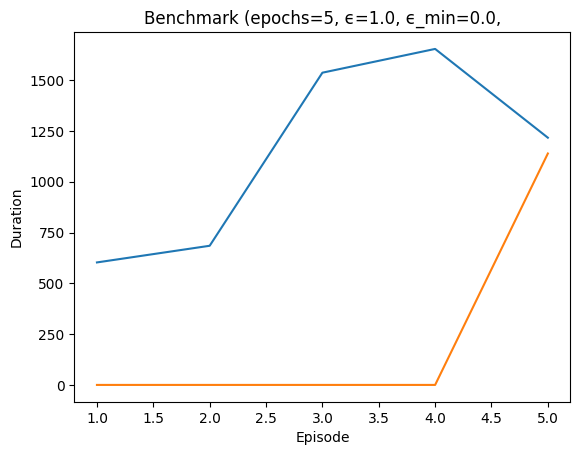

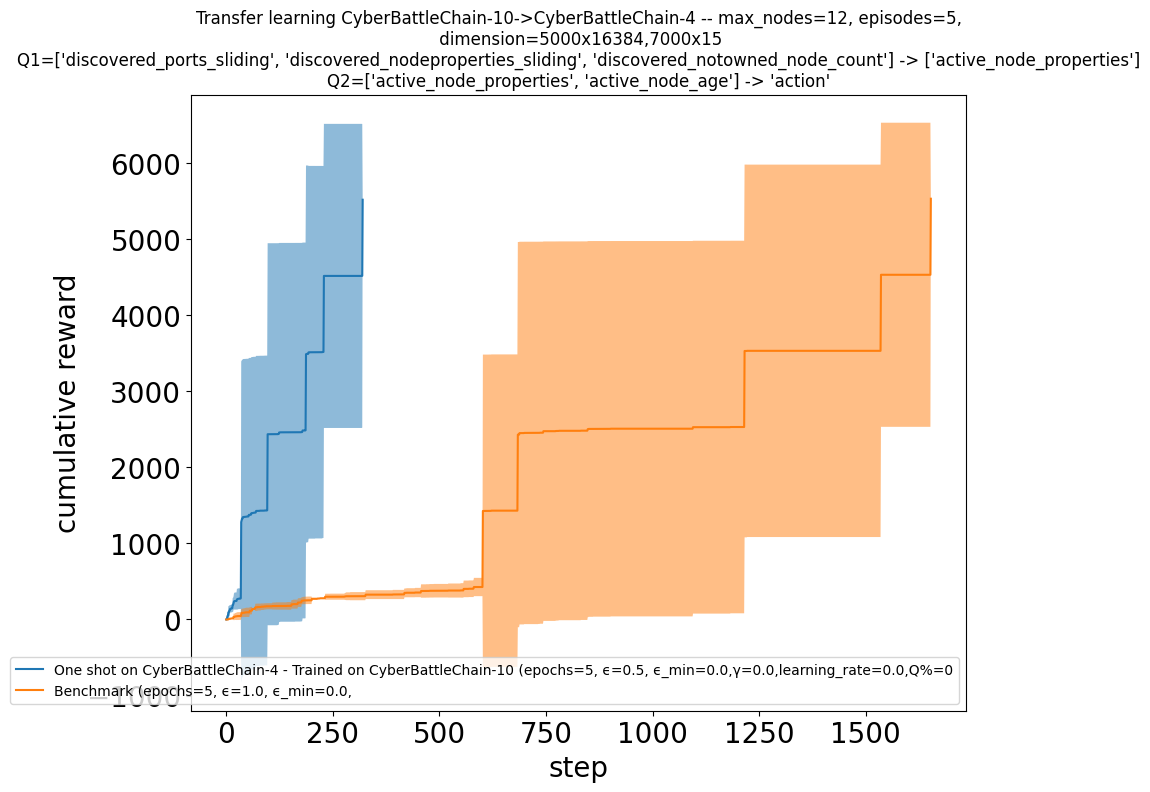

In [31]:
# Train Q-matrix on CyberBattle network of size 4
cyberbattlechain_4 = gym.make('CyberBattleChain-v0', size=4,
                              attacker_goal=AttackerGoal(own_atleast_percent=1.0)
                              )

qlearning_bestrun_4 = qlearning_run(0.015, gym_env=cyberbattlechain_4)


def stop_learning(trained_learner):
    return TrainedLearner(
        learner=a.QTabularLearner(
            ep,
            gamma=0.0,
            learning_rate=0.0,
            exploit_percentile=0,
            trained=trained_learner['learner']
        ),
        title=trained_learner['title'],
        trained_on=trained_learner['trained_on'],
        all_episodes_rewards=trained_learner['all_episodes_rewards'],
        all_episodes_availability=trained_learner['all_episodes_availability']
    )


learner.transfer_learning_evaluation(
    environment_properties=ep,
    trained_learner=stop_learning(qlearning_bestrun_4),
    eval_env=cyberbattlechain_10,
    eval_epsilon=0.5,  # alternate with exploration to help generalization to bigger network
    eval_episode_count=eval_episode_count,
    iteration_count=iteration_count
)

learner.transfer_learning_evaluation(
    environment_properties=ep,
    trained_learner=stop_learning(qlearning_bestrun_10),
    eval_env=cyberbattlechain_4,
    eval_epsilon=0.5,
    eval_episode_count=eval_episode_count,
    iteration_count=iteration_count
)